## **The Meteostat Library**

"The Meteostat Python library provides a simple API for accessing open weather and climate data. The historical observations and statistics are collected by Meteostat from different public interfaces, most of which are governmental.

Among the data sources are national weather services like the National Oceanic and Atmospheric Administration (NOAA) and **Germany's national meteorological service (DWD)**"

For more detailled information, have a look at:

- [Meteostat Documentation](https://dev.meteostat.net/guide.html)
- [Meteostat Git Python Library](https://github.com/meteostat/meteostat-python)

In [ ]:
!pip install meteostat

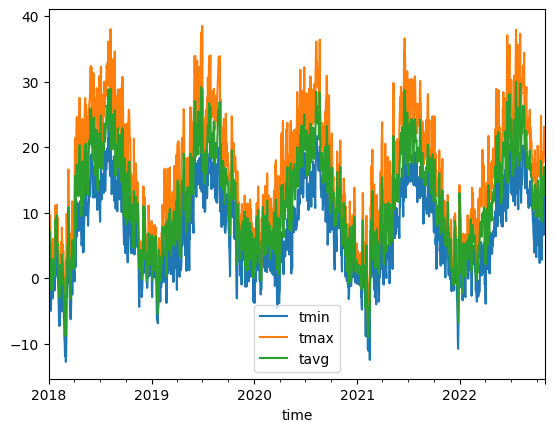

In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 10, 31)

# Create Point for Berlin, DE
location = Point(52.520008, 13.404954)

# Get daily data for 2018
data = Daily(location,start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=[ 'tmin', 'tmax', 'tavg'])
plt.show()

In [ ]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,8.5,4.1,12.0,3.8,0.0,218.0,16.9,57.2,1001.1,126.0
2018-01-02,4.6,2.5,6.1,1.8,0.0,238.0,11.9,30.6,1006.1,0.0
2018-01-03,5.1,2.1,7.7,17.9,0.0,198.0,20.9,61.9,990.8,78.0
2018-01-04,6.8,5.8,7.9,1.7,0.0,233.0,19.4,61.9,992.9,0.0
2018-01-05,7.1,4.2,9.6,0.1,0.0,234.0,16.2,53.3,996.1,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-10-27,14.7,9.7,20.3,0.0,0.0,198.0,7.2,21.2,1024.8,532.0
2022-10-28,17.0,10.8,23.1,0.0,0.0,181.0,9.0,24.1,1020.4,444.0
2022-10-29,16.9,13.7,21.0,0.0,0.0,227.0,7.9,20.2,1020.8,405.0


### **Data Attributes**

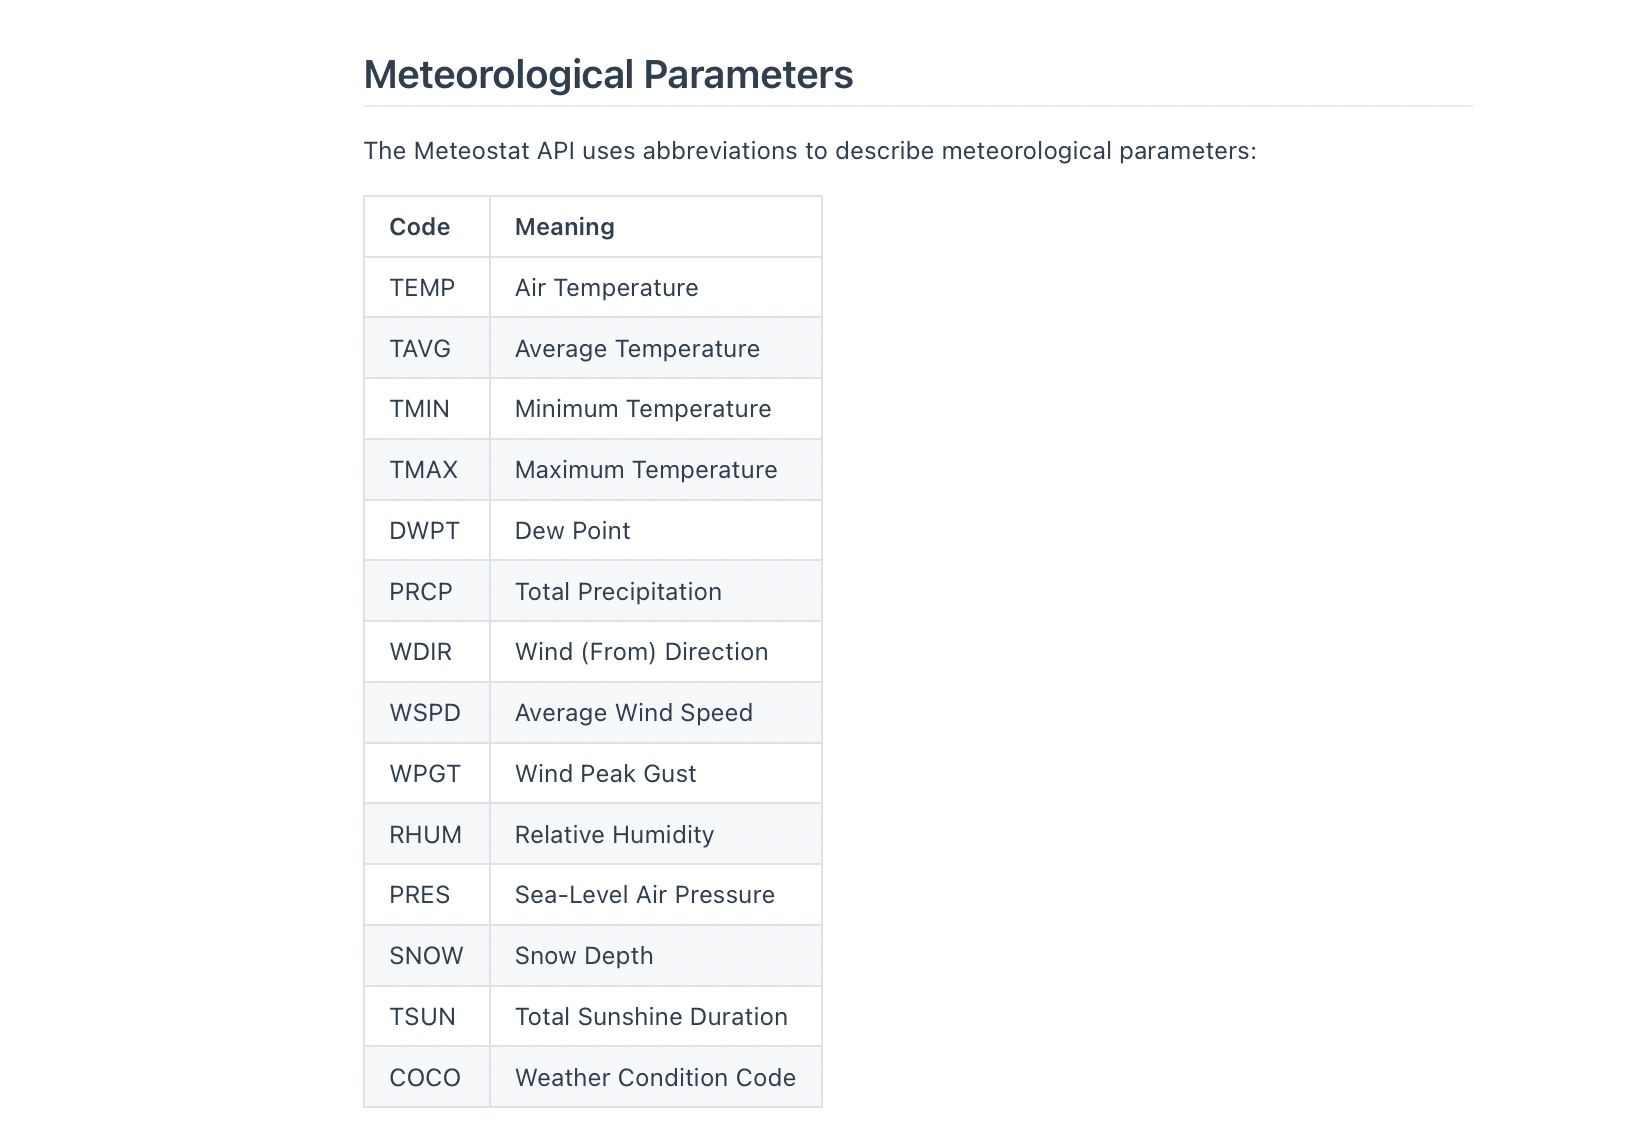

In [ ]:
data = Hourly('10015', start=start, end=end)
coverage = data.coverage()

In [ ]:
coverage

1.0

### **Retrieving weather data by region**
Meteostat allows to pull data by point, region, bounds and also by a feature called "nearby". It would allow us to retrieve data from all registered weather stations in Germany.



In [28]:
from meteostat import Stations

stations = Stations()
stations = stations.region('DE')

In [29]:
stations

In [30]:
# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 1, 2)

In [31]:
stations = stations.inventory('hourly', (start, end))

In [33]:
stations = stations.fetch(sample = 100)

In [34]:
data = Hourly(stations,start, end)
data = data.fetch()

In [12]:
data

tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
station time                                                                  
10015   2018-01-01   6.9   5.2   8.0   1.3   NaN  227.0  45.0  80.6   993.9   
        2018-01-02   6.4   5.1   7.3  18.9   NaN  245.0  30.2  68.4  1002.6   
        2018-01-03   6.7   5.3   8.0  10.0   NaN  236.0  52.6  92.2   980.7   
        2018-01-04   6.5   5.3   7.2   6.0   NaN  249.0  25.6  69.8   988.9   
        2018-01-05   6.0   4.9   7.3   4.0   NaN  239.0  26.3  75.2   991.5   
...                  ...   ...   ...   ...   ...    ...   ...   ...     ...   
ZVFY7   2018-01-04   NaN   NaN   NaN  11.3   NaN    NaN   NaN   NaN     NaN   
        2018-01-05   NaN   NaN   NaN   3.9   NaN    NaN   NaN   NaN     NaN   
        2018-01-06   NaN   NaN   NaN   8.7   NaN    NaN   NaN   NaN     NaN   
        2018-01-07   NaN   NaN   NaN   2.3   NaN    NaN   NaN   NaN     NaN   
        2018-01-08   NaN   NaN   NaN   0.0   NaN    NaN   NaN   NaN     NaN   

                     tsun  
station time               
10015   2018-01-01   84.0  
        2018-01-02  192.0  
        2018-01-03   42.0  
        2018-01-04   36.0  
        2018-01-05    0.0  
...                   ...  
ZVFY7   2018-01-04    NaN  
        2018-01-05    NaN  
        2018-01-06    NaN  
        2018-01-07    NaN  
        2018-01-08    NaN  

[8116 rows x 10 columns]